# Data Preparation

Original work is created by Elie Kawerk, "Customer Segmentation".

Often, the most interesting machine learning applications require you to **wrangle** your data first. Data wrangling is the data preparation process that transforms, and maps, data from the raw format into the appropriate format.

For this workbook, Elie Kawerk prepared the **transaction-level** dataset for the customer segmentation task. By transaction-level data, we refers to the fact that each observation in the dataset is a single transaction, specifically, one item, one customer, one purchase.

To get a **customer-level** data (since we want to build clusters for customers, not transactions), we need to **aggregate transactions by customer** and **engineer customer-level features**.

* This step blends together exploratory analysis, data cleaning, and feature engineering.
* Here, feature engineering comes from aggregating the transaction-level data.
* As you'll see, you still have a lot of room for creativity in this step!

<br><hr id="toc">

### In the first step, data wrangle...

We will cover:
1. [Transaction-level exploration](#exploration)
2. [Transaction-level cleaning](#cleaning)
3. [Customer-level feature engineering](#customer-level)
4. [Intermediary levels](#intermediary-levels)
5. [Joining together the ABT](#joining)


<br><hr>

### First, let's import libraries and load the dataset.

First, import libraries that you'll need.

In [8]:
# print_function for compatibility with Python 3
from __future__ import  print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

Next, let's import the dataset.
* The file path is <code style="color:crimson">'project_files/int_online_tx.csv'</code>

In [2]:
# Load international online transactions data from CSV
df = pd.read_csv('project_files/int_online_tx.csv')

Now we're ready to jump into wrangling the data!

<span id="exploration"></span>
# 1. Transaction-level exploration

Even though we eventually want customer-level data, it's still helpful to do some basic exploratory analysis at the transaction level. 

<br>
**First, display the shape of the dataset.**

In [3]:
# Dataframe dimensions
df.shape

(35116, 8)

**Next, display the first 10 observations from the dataset.**

In [4]:
# First 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


**Finally, display the distribution of transactions by country.**

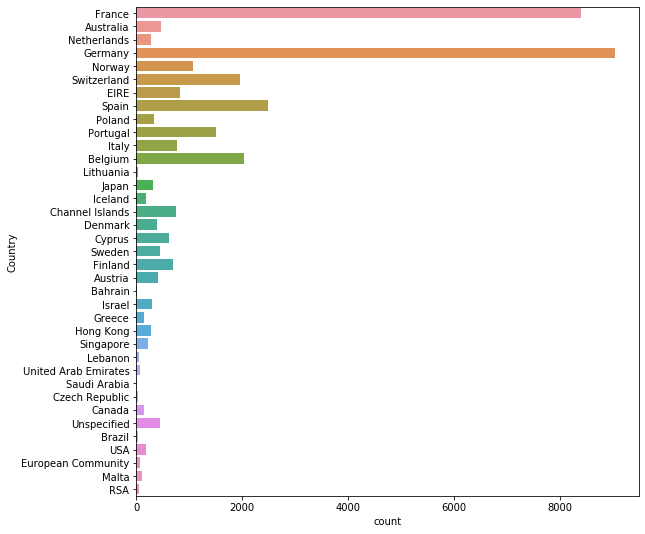

In [5]:
# Make figsize 9x9
plt.figure(figsize=(9,9))

# Bar plot by country
sns.countplot(y = 'Country', data=df)
plt.show()

<span id="cleaning"></span>
# 2. Transaction-level cleaning

Before we aggregate to the customer level, we need to tidy up a few things at the transaction level.

<br>
**Display the number of missing observations for each feature.**

In [6]:
# Missing data by feature
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

**Drop observations with missing customer ID's.**

In [7]:
# Only keep transactions with CustomerID's
df.dropna(inplace=True)

**Next, just for clarity, convert the CustomerID's from floats into integers.**
* This is technically not required, but it's good practice.
* ID's should be saved as strings or integers just so they don't get mixed up with other numeric features.
* Then, display the first 5 CustomerID's in the transaction dataset just to confirm.

In [8]:
# Convert customer ID's into integers
df['CustomerID'] = df['CustomerID'].astype('int')

# Display first 5 CustomerID's in the transaction dataset
df['CustomerID'].head(5)

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int64

**Create a <code style="color:steelblue">'Sales'</code> interaction feature.**
* Then, display the first 5 Sales values in the transaction dataset just to confirm.

In [9]:
# Create 'Sales' interaction feature
df["Sales"] = df["UnitPrice"] * df["Quantity"]

# Display first 5 Sales values in the transaction dataset
df["Sales"].head(5)

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

**Before moving on, save your cleaned transaction-level data as <code style="color:crimson">cleaned_transactions.csv</code>.**
* We'll soon create the features for individual items.
* Remember to set <code style="color:steelblue">index=None</code> to save only the data and not the auto-generated index.

In [10]:
# Save cleaned transaction-level data
df.to_csv('cleaned_transactions.csv', index=None)

<span id="customer-level"></span>
# 3. Customer-level feature engineering

Now that we have a cleaned transaction-level dataset, it's time to **roll it up** to the customer level, which we'll feed into our machine learning algorithms later.

<br>
**First, we'll aggegrate invoice data by customer. We'll engineer 1 feature:**
* <code style="color:steelblue">'total_transactions'</code> - the total number of unique transactions for each customer.

In [11]:
# Aggegrate invoice data
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({'total_transactions':'nunique'})

# Display invoice data for first 5 customers
invoice_data.head(5)

/home/elie/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


**Next, using the same technique, aggregate product data by customer. Engineer 2 features:**
* <code style="color:steelblue">'total_products'</code> - the total number of products purchased by each customer (not the unit Quantity within each product!).
* <code style="color:steelblue">'total_unique_products'</code> - the number of unique products purchased by each customer.
* **Hint:** you'll want to use the Item ID column (i.e. StockCode) after your groupby!
* Let's name it <code style="color:crimson">product_data</code>.

In [12]:
# Aggregate product data
product_data = df.groupby('CustomerID').StockCode.agg({
                                'total_products':'count',
                                 'total_unique_products':'nunique'})

# Display product data for first 5 customers
product_data.head(5)

/home/elie/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


**Finally, aggregate sales data by customer. Engineer 2 features:**
* <code style="color:steelblue">'total_sales'</code> - the total sales for each customer.
* <code style="color:steelblue">'avg_product_value'</code> - the average value of the products purchased by the customer (not the UnitPrice!).
* **Hint:** you'll want to use the Sales column after your groupby!
* Let's name it <code style="color:crimson">sales_data</code>.

In [13]:
# Roll up sales data
sales_data = df.groupby('CustomerID').Sales.agg({
                    'total_sales': 'sum',
                     'avg_product_value': 'mean'
                        })

# Display sales data for first 5 customers
sales_data.head(5)

/home/elie/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,avg_product_value,total_sales
CustomerID,,
12347,23.681319,4310.00
12348,57.975484,1797.24
12349,24.076027,1757.55
12350,19.670588,334.40
12352,29.482824,2506.04


<span id="intermediary-levels"></span>
# 4. Intermediary levels

You won't always be able to easily roll up to customer-level directly... Sometimes, it will be easier to create intermediary levels first.

<br>
**Let's first aggregate cart data at the "cart-level."**
* We'll group by <code style="color:steelblue">'CustomerID'</code> AND by <code style="color:steelblue">'InvoiceID'</code>. Remember, we're treating each invoice as a "cart."
* Then, we'll calculate <code style="color:steelblue">'cart_value'</code> by taking the sum of the Sales column. This is the total sales by invoice (i.e. cart).
* Finally, we'll call <code style="color:steelblue">.reset_index()</code> to turn CustomerID and InvoiceID back into regular columns so we can perform another aggregation.

In [14]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = df.groupby(['CustomerID', 'InvoiceNo']).Sales.agg({
                'cart_value': 'sum',
                 } )

# Reset index
cart_data.reset_index(inplace=True)

# Display cart data for first 5 CARTS
cart_data.head(5)

/home/elie/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


**Aggregate cart data by customer. Engineer 3 features:**
* <code style="color:steelblue">'avg_cart_value'</code> - average cart value by customer.
* <code style="color:steelblue">'min_cart_value'</code> - minimum cart value by customer.
* <code style="color:steelblue">'max_cart_value'</code> - maximum cart value by customer.
* Let's name it <code style="color:crimson">agg_cart_data</code>.

In [15]:
# Aggregate cart data (at customer-level)
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({
    'avg_cart_value': 'mean',
    'min_cart_value': 'min',
    'max_cart_value': 'max'
})


# Display cart data for first 5 CUSTOMERS
agg_cart_data.head(5)

/home/elie/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,
12347,224.82,1294.32,615.714286
12348,227.44,892.80,449.310000
12349,1757.55,1757.55,1757.550000
12350,334.40,334.40,334.400000
12352,120.33,840.30,313.255000


<span id="joining"></span>
# 5. Joining together the ABT

Great, now you have multiple dataframes that each contain customer-level features. 

<br>
**Let's join the various customer-level datasets together with the <code style="color:steelblue">.join()</code> function.**
* Just pick one of the customer-level dataframes and join it to a list of the others.
* By default, it will join the dataframes on their <code style="color:steelblue">index</code>... In this case, it will join by CustomerID, which is exactly what we want.
* You can read more about the <code style="color:steelblue">.join()</code> function in the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html" target="_blank">documentation</a>.

In [16]:
# Join together customer-level ABT
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000


**Finally, let's save <code style="color:crimson">customer_df</code> as our analytical base table to use later.**
* **Important:** We will not set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index (this will be important when we get to Module 4).

In [17]:
# Save analytical base table
customer_df.to_csv('analytical_base_table.csv')

<br>
### The next step, dimensionality reduction


In this step, Dimensionality Reduction</span>, we'll see how trying to include features for individual items can raise new challenges (i.e. The Curse of Dimensionality). We'll also introduce you to the first of 2 recommended solutions: thresholding.

Note that, our client wishes to incorporate information about **specific item purchases** into the clusters. For example, our model should be more likely to group together customers who buy similar items.

* In this module, we'll prepare individual item features for our clustering algorithms.
* The Curse of Dimensionality is especially relevant for clustering because it means observations are "far away" from each other.
* We'll introduce a simple way to reduce the number of dimensions by applying thresholds.

<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [Item data](#item-data)
2. [Toy example: rolling up item data](#toy)
3. [High dimensionality](#high-dimensionality)
4. [Thresholds](#thresholds)

Next, let's import the cleaned dataset (not the analytical base table) that we saved in the previous module.
* Remember, we saved it as <code style="color:crimson">'cleaned_transactions.csv'</code>.

<span id="item-data"></span>
# 1. Item data

So how does The Curse of Dimensionality arise in this problem?

<br>
**Display the first 10 StockCodes and Descriptions from the transaction dataset.**

In [9]:
# Read cleaned_transactions.csv
df = pd.read_csv('cleaned_transactions.csv')
# First 10 StockCodes and Descriptions
df[['StockCode','Description']].head(10)

,StockCode,Description
0,22728,ALARM CLOCK BAKELIKE PINK
1,22727,ALARM CLOCK BAKELIKE RED
2,22726,ALARM CLOCK BAKELIKE GREEN
3,21724,PANDA AND BUNNIES STICKER SHEET
4,21883,STARS GIFT TAPE
5,10002,INFLATABLE POLITICAL GLOBE
6,21791,VINTAGE HEADS AND TAILS CARD GAME
7,21035,SET/2 RED RETROSPOT TEA TOWELS
8,22326,ROUND SNACK BOXES SET OF4 WOODLAND
9,22629,SPACEBOY LUNCH BOX


**Next, display the number of unique items in the dataset.**

In [10]:
# Number of unique items
df['StockCode'].nunique()

2574

<span id="toy"></span>
# 2. Toy example: rolling up item data

To illustrate how we'll **roll up item information to the customer level**, let's use another toy example. 

<br>
**First, create a <code style="color:crimson">toy_df</code> that only contains transactions for 2 customers.**
* Include transactions for these 2 CustomerID's: <code style="color:crimson">14566</code> and <code style="color:crimson">17844</code>.
* By the way, there's nothing special about these customers... we just chose them because they have relatively few purchases, making the toy example more manageable.
* Then, display the toy dataframe.

In [11]:
# Create toy_df
# toy_df = df.loc[(df.CustomerID == 14566 )|(df.CustomerID == 17844)]
toy_df = df[df.CustomerID.isin([14566,17844])]

# Display toy_df
toy_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
19250,563900,85099C,JUMBO BAG BAROQUE BLACK WHITE,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19251,563900,85099B,JUMBO BAG RED RETROSPOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19252,563900,23199,JUMBO BAG APPLES,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19253,563900,22386,JUMBO BAG PINK POLKADOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19851,564428,21993,FLORAL FOLK STATIONERY SET,12,8/25/11 11:27,1.25,17844,Canada,15.00
19852,564428,23295,SET OF 12 MINI LOAF BAKING CASES,8,8/25/11 11:27,0.83,17844,Canada,6.64
19853,564428,23293,SET OF 12 FAIRY CAKE BAKING CASES,16,8/25/11 11:27,0.83,17844,Canada,13.28
19854,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,8/25/11 11:27,1.25,17844,Canada,10.00
19855,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,8/25/11 11:27,0.83,17844,Canada,6.64


**Create a dataframe of dummy variables for <code style="color:steelblue">'StockCode'</code>.**
* Name it <code style="color:crimson">toy_item_dummies</code>.
* We don't need the other features right now, so you can actually just directly pass in the <code style="color:steelblue">toy_df.StockCode</code> Series to <code style="color:steelblue">pd.get_dummies()</code>.
* Then, add <code style="color:steelblue">'CustomerID'</code> to this new dataframe so that we can roll up by customer later.
* Finally, display the dataframe.

In [12]:
# Get toy_item_dummies
toy_item_dummies  = pd.get_dummies(toy_df.StockCode)

# Add CustomerID to toy_item_dummies
toy_item_dummies['CustomerID'] = toy_df['CustomerID']

# Display toy_item_dummies
toy_item_dummies

,21993,22386,23199,23293,23294,23295,23296,85099B,85099C,CustomerID
19250,0,0,0,0,0,0,0,0,1,14566
19251,0,0,0,0,0,0,0,1,0,14566
19252,0,0,1,0,0,0,0,0,0,14566
19253,0,1,0,0,0,0,0,0,0,14566
19851,1,0,0,0,0,0,0,0,0,17844
19852,0,0,0,0,0,1,0,0,0,17844
19853,0,0,0,1,0,0,0,0,0,17844
19854,0,0,0,0,0,0,1,0,0,17844
19855,0,0,0,0,1,0,0,0,0,17844


**Finally, we can aggregate this information to the customer-level**.
* In fact, it's as simple as grouping by customer and counting the number of times each customer bought each item.

In [13]:
# Create toy_item_data by aggregating at customer level
toy_item_data = toy_item_dummies.groupby('CustomerID').sum()

# Display toy_item_data
toy_item_data

,21993,22386,23199,23293,23294,23295,23296,85099B,85099C
CustomerID,,,,,,,,,
14566,0,1,1,0,0,0,0,1,1
17844,1,0,0,1,1,1,1,0,0


<span id="high-dimensionality"></span>
# 3. High dimensionality

Now, perhaps the alarms in your head have already started ringing!

<br>
**First, create a dataframe of dummy variables for <code style="color:steelblue">'StockCode'</code>, this time for the full dataset.**
* Name it <code style="color:crimson">item_dummies</code>.
* Then, add <code style="color:steelblue">'CustomerID'</code> to this new dataframe so that we can roll up by customer later.
* Then, display the first 5 rows in this dataframe.

In [14]:
# Get item_dummies
item_dummies = pd.get_dummies(df['StockCode'])

# Add CustomerID to item_dummies
item_dummies['CustomerID'] = df['CustomerID']

# Display first 5 rows of item_dummies
item_dummies.head(5)

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583


**Next, roll up the item dummies data into customer-level item data**.
* Name it <code style="color:crimson">item_data</code>.
* This could take a few seconds.
* Then, display the first 5 rows of the dataframe.

In [15]:
# Create item_data by aggregating at customer level
item_data = item_dummies.groupby('CustomerID').sum()

# Display first 5 rows of item_data
item_data.head(5)

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5


**Finally, let's display the total number times each item was purchased.**
* This quick check confirms these features are pretty sparse.

In [16]:
# Total times each item was purchased
item_data.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

**Before moving on, let's save this customer-level item dataframe as <code style="color:crimson">'item_data.csv'</code>. We'll use it again in the next module.**
* In the next module, we'll look at an alternative way to reduce dimensionality.
* Again, we won't set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [17]:
# Save item_data.csv
item_data.to_csv('item_data.csv')

<span id="thresholds"></span>
# 4. Thresholds

One very **simple and straightforward way** to reduce the dimensionality of this item data is to set a **threshold** for keeping features.

<br>
**First, we can see which items those are and the number of times they were purchased.**
1. Take the sum by column.
* Sort the values.
* Look at the last 20 (since they are sorted in ascending order by default).

In [18]:
# Display most popular 20 items
item_data.sum().sort_values().tail(20)

22961      114
22630      115
22139      117
21080      122
85099B     123
20726      123
20719      128
20750      132
23084      140
20725      141
21212      143
22551      158
22629      160
22328      166
21731      169
22556      179
22554      197
22423      222
22326      271
POST      1055
dtype: int64

**Next, if we take the <code style="color:steelblue">.index</code> of the above series, we can get just a list of the StockCodes for those 20 items.**

In [19]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values().tail(20).index

top_20_items

Index(['22961', '22630', '22139', '21080', '85099B', '20726', '20719', '20750',
       '23084', '20725', '21212', '22551', '22629', '22328', '21731', '22556',
       '22554', '22423', '22326', 'POST'],
      dtype='object')

**Finally, we can keep only the features for those 20 items.**

In [20]:
# Keep only features for top 20 items
top_20_item_data  = item_data[top_20_items]

# # Shape of remaining dataframe
top_20_item_data.shape

(414, 20)

Here, take a look:

In [21]:
# Display first 5 rows of top_20_item_data
top_20_item_data.head(5)

,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


**Finally, save this top 20 items dataframe as <code style="color:crimson">'threshold_item_data.csv'</code>.**
* We'll see a different way to reduce dimensionality in the next module, but we'll come back to this dataframe again in Module 4.
* Don't set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [22]:
# Save threshold_item_data.csv
top_20_item_data.to_csv('threshold_item_data.csv')

### The PCA

As discussed, Principal Component Analysis is a popular dimensionality reduction technique.

PCA seeks to create new features by finding linear combinations of your original ones. These new features, called **principal components**, are meant to maximize the **"explained variance,"** which we'll explain further in the module.

* In this module, we'll prepare individual item features for our clustering algorithms, except this time we'll use PCA instead of thresholding.
* PCA is especially effective when you have many correlated features.
* Important: PCA creates new features that replace the original ones.



In this module, we'll cover:
1. [Toy example: oval blob](#oval-blob)
2. [Principal components](#components)
3. [Dimensionality reduction](#reduction)
4. [Item data PCA](#item-data)
5. [Explained variance](#explained-variance)

In [23]:
#import additional libraries

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import  PCA

Next, let's do a clean import the full item data that we saved in the previous step (before applying thresholds).
* Remember, we saved it as <code style="color:crimson">'item_data.csv'</code>.
* This time, we'll also pass in the argument <code style="color:steelblue">index_col=0</code> to tell Pandas to treat the first column (CustomerID) as the index.

In [24]:
# Read item_data.csv
item_data = pd.read_csv('item_data.csv', index_col=['CustomerID'])
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5


Just to confirm, this dataset should have 2574 features:

In [25]:
# Display item_data's shape
item_data.shape

(414, 2574)

<span id="oval-blob"></span>
# 1. Toy example: oval blob

PCA is an elegant technique that's very practical, but it can be a bit hard to try it on our larger dataset right away.

Instead, let's first use one last toy example to break down the intuition behind PCA.

<br>
**First, we'll create an "oval blob" synthetic dataset.**
* Instead of both input features and a target variable, we'll only have 2 input features.
* $x_1$ will be random samples from a normal distribution.
* $x_2$ will be random samples from a normal distribution **plus $x_1$**.

In [26]:
# Set random seed
np.random.seed(101)

# Create first feature: x1
x1 = np.random.normal(0,1,100)

# Create second feature: x2
x2 = x1 + np.random.normal(0,1,100)

**Let's stack them together to form <code style="color:steelblue">X</code>, our input feature matrix.**
* We'll skip putting them in a Pandas DataFrame.
* Instead, we'll just stack them together as two separate columns in a matrix.

In [27]:
# Stack together as columns
X = np.column_stack([x1,x2])

# Print shape of X
X.shape

(100, 2)

**Create a scaled version of your feature matrix and name it <code style="color:steelblue">X_scaled</code>.**
* You'll want to use <code style="color:steelblue">StandardScaler</code>.
* **Tip:** To fit and apply a transformation in one line of code, you can use the <code style="color:steelblue">.fit_transform()</code> function.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [28]:
# Initialize instance of StandardScaler
sc = StandardScaler()

# Fit and transform X
X_scaled = sc.fit_transform(X)

# Display first 5 rows of X_scaled
X_scaled[:5]

array([[ 2.45737416,  2.76968241],
       [ 0.44665735, -0.38363275],
       [ 0.71733989, -0.37695455],
       [ 0.3264168 , -0.60579169],
       [ 0.46889068,  0.39146426]])

**Plot a scatterplot of the scaled $x_1$ against the scaled $x_2$.**
* Label your axes as <code style="color:crimson">x1 (scaled)</code> and <code style="color:crimson">x2 (scaled)</code>.
* **Tip:** Call <code style="color:steelblue">plt.axis('equal')</code> after your scatterplot to put your plot's axes on the same scale.
* We have a recommended plot below. See the Answer Key for how to create it.

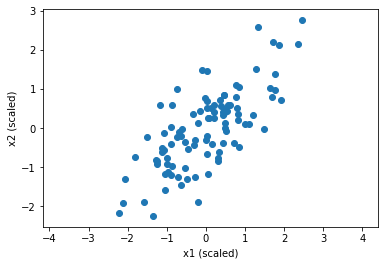

In [29]:
# Plot scatterplot of scaled x1 against scaled x2
plt.scatter(X_scaled[:,0],X_scaled[:,1])

# Put plot axes on the same scale
plt.axis('equal')

# Label axes
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')

# Clear text residue
plt.show()

<span id="components"></span>
# 2. Principal components

As it turns out, this type of distribution is very helpful for visualizing the mechanics behind PCA.

<br>
**First, add the following import line to your library imports above. Then, re-run that code cell.**

<pre style="color:steelblue">
from sklearn.decomposition import PCA
</pre>

<br>
**Next, we can initialize an instance of the PCA transformation.**
* This is just as we did for the StandardScaler transformation. 
* Then, we can fit the instance with just one line of code.

In [30]:
# Initialize instance of PCA transformation
pca = PCA()

# Fit the instance
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Let's display the principal components.**

In [31]:
# Display principal components
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

**Next, let's overlay the principal components on our oval blob.**
* We'll make the oval blob semi-transparent so we can see the principal components more easily.
* For clarity, we'll plot the first principal component in **black**, and we'll make it twice as long.
* We'll plot the first principal component in <strong style="color:red">red</strong>.

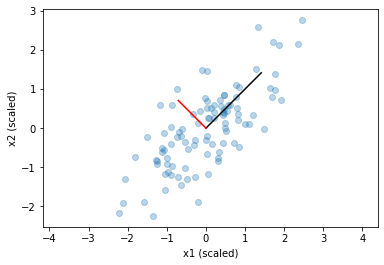

In [32]:
# Plot scaled dataset and make it partially transparent
plt.scatter(X_scaled[:,0], X_scaled[:,1], alpha=0.3)

# Plot first principal component in black
plt.plot([0,2*pca.components_[0,0]],[0,2*pca.components_[0,1]],'k')

# Plot second principal component in red
plt.plot([0,pca.components_[1,0]],[0,pca.components_[1,1]],'r')

# Set axes
plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')

# Clear text residue
plt.show()

**Finally, we can transform our original features using the fitted PCA instance.**
* Remember, PCA generates new features that **replace** the original ones.
* We'll name these new features <code style="color:crimson">PC</code> (short for "principal component") to indicate that they are generated from PCA.

In [34]:
# Generate new features
PC = pca.transform(X_scaled)

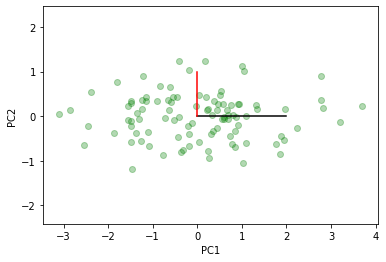

In [35]:
# Plot transformed dataset
plt.scatter(PC[:,0], PC[:,1],alpha=0.3, color='g')

# Plot first principal component in black
plt.plot([0,2],[0,0],'k')


# Plot second principal component in red
plt.plot([0,0],[0,1],'r')


# Set axes
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Clear text residue
plt.show()

<span id="reduction"></span>
# 3. Dimensionality reduction

Here's where dimensionality reduction comes into play. You can just keep some number of the "best" components, a.k.a. the ones that explain the most variance.

<br>
**First, display the "explained variance" ratio of each component.**

In [36]:
# Display explained variance ratio
pca.explained_variance_ratio_

array([0.86915841, 0.13084159])

**To keep only 1 component, we can simply initialize and fit another PCA transformation.**
* This time, we'll simply pass the argument <code style="color:steelblue">n_components=1</code>.

In [37]:
# Initialize and fit a PCA transformation, only keeping 1 component
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
# Display principal components
pca.components_

array([[0.70710678, 0.70710678]])

In [39]:
# Generate new features
PC = pca.transform(X_scaled)
print(PC.shape)

(100, 1)


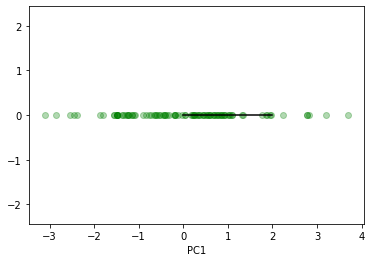

In [40]:
# Plot transformed dataset
plt.scatter(PC[:,0], len(PC)*[0], color='g', alpha=0.3)

# Plot first principal component in black
plt.plot([0,2], [0,0],'k')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')

# Clear text residue
plt.show()

<span id="item-data"></span>
# 4. Item data PCA

Now let's get back to our project.

<br>
**First, scale <code style="color:crimson">item_data</code>, which you imported at the beginning of this module.**
* Name the scaled dataset <code style="color:crimson">item_data_scaled</code>.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [41]:
# Initialize instance of StandardScaler
sc = StandardScaler()

# Fit and transform item_data
item_data_scaled = sc.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

**Next, initialize and fit an instance of the PCA transformation.**
* Keep all of the components for now (just don't pass in any argument).

In [42]:
# Initialize and fit a PCA transformation
pca = PCA()

**Finally, generate new "principal component features" from <code style="color:crimson">item_data_scaled</code>.**
* Name the new array <code style="color:crimson">PC_items</code>.
* Then, display the first 5 rows.

In [43]:
# Generate new features
PC = pca.fit_transform(item_data_scaled)

# Display first 5 rows
PC[:5]

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  4.08162129e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04,  4.08162129e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04,  4.08162129e-15],
       [-4.92931983e+00, -7.14858724e-01, -1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05,  4.08162129e-15],
       [-2.05311348e+00,  2.11095022e+00,  1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04,  4.08162129e-15]])

<span id="explained-variance"></span>
# 5. Explained variance

Earlier, we already saw how to display the **explained variance ratio** for each of the principal components.

<br>
**It's very helpful to calculate and plot the <u>cumulative</u> explained variance.**
* This will tell us the total amount of variance we'd capture if we kept up to the n-th component.
* First, we'll use <code style="color:steelblue">np.cumsum()</code> to calculate the cumulative explained variance.
* Then, we'll plot it so we can see how many $PC$ features we'd need to keep in order to capture most of the original variance.

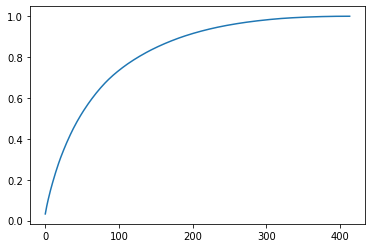

In [44]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.show()

In [45]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[125]

0.7977164839441886

**Initialize and fit another PCA transformation.**
* This time, only keep 125 components.
* Generate the principal component features from the fitted instance and name the new matrix <code style="color:crimson">PC_items</code>.
* Then, display the shape of <code style="color:crimson">PC_items</code> to confirm it only has 125 features.

In [46]:
# Initialize PCA transformation, only keeping 125 components
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 125)

**Next, for convenience, let's put <code style="color:crimson">PC_items</code> into a new dataframe.**
* We'll also name the columns and update its index to be the same as the orginal <code style="color:crimson">item_data</code>'s index.

In [47]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i+1) for i in range(items_pca.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,-2.053129,2.110788,0.184844,0.128379,0.087133,-1.943497,2.383475,0.898283,-0.672848,0.081181,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235


**Finally, save this item dataframe with PCA features as <code style="color:crimson">'pca_item_data.csv'</code>.**
* In <span style="color:royalblue">Module 4</span>, we'll compare the clusters made from using these features against those in <code style="color:crimson">'threshold_item_data.csv'</code>.
* Do **not** set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [48]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')

<br>
## Next Steps

In the next step, <span style="color:royalblue">Cluster Analysis</span>, we'll see how different feature sets lead to different clusters. We'll apply K-Means clustering to the analytical base table, the threshold item features, and the PCA item features.
